# **google drive.mount**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **import  ta-lib and ...**

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

import talib

# **import** **LIB**...

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
import numpy as np
from scipy import stats
from pandas import DataFrame
import xlrd 
from datetime import datetime
import matplotlib.pyplot as plt
import datetime
import random
import math
import sklearn
import sklearn.preprocessing
from sklearn import preprocessing
from collections import deque
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
#!pip install tehran_stocks
#from tehran_stocks import get_all_price, Stocks, update_group, db
#!pip install tpot
!pip install evaluation

from google.colab import files
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, LSTM, BatchNormalization
from keras import callbacks
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot
%matplotlib inline 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 921 kB/s 
  Created wheel for evaluation: filename=evaluation-0.0.2-py3-none-any.whl size=2479 sha256=bbfcc5fbd4ab8dabc0a51b5679cc7493c407e7160d9a97330fbe9ef005a062e5
  Stored in directory: /root/.cache/pip/wheels/18/75/b8/63929bfb42b59346c83a70f51ef709888e344cb34172930ef2
  Created wheel for python-gflags: filename=python_gflags-3.1.2-py3-none-any.whl size=57386 sha256=b82ebb32f7f5b18bbc18ac4991c37e3cdc2255510e393c7caa79e69aa957d9af
  Stored in directory: /root/.cache/pip/wheels/df/27/8a/e46bf628958f821f7d2092f276f5a81e184bcf1a1ccdeecd95
Successfully built evaluation python-gflags


# **def dollar**

In [ ]:
def dollar():
  global dolar
  dollar_his='/content/drive/My Drive/Colab Notebooks/total data/dollar data.xlsx' 
  location_2=dollar_his

  dataset_dollar= pd.read_excel(location_2, usecols=[0,1])
  dataset_dollar=dataset_dollar.dropna()
  dataset_dollar=dataset_dollar[['<DTYYYYMMDD>','<Close>']]
  dataset_dollar['<Close>'].values.astype(int)
  dataset_dollar['<DTYYYYMMDD>'] = pd.to_datetime(dataset_dollar['<DTYYYYMMDD>'],format='%Y%m%d').dt.strftime("%Y%m%d"); dataset_dollar
  
  #url_dollar='https://www.tgju.org/chart-summary-ajax/price_dollar_rl?_=1580199658457'
  
  url_dollar='https://api.tgju.online/v1/market/indicator/summary-table-data/price_dollar_rl?'
  page = requests.get(url_dollar)
  soup=BeautifulSoup((page.text),"lxml")
  t=soup.find('span')
  output = []
  file_input = (t.text).split('"')
  for row in file_input:
      output.append(row.split('",'))
  
  tarikh_sh=[]
  tarikh_m=[]
  gheymat=[]
  a=0                        
  while (16*a)<=(len(output)-20) :
      tarikh_sh.append(output[16*a + 6])
      tarikh_m.append(output[16*a + 4])
      gheymat.append(output[16*a+8])
      a=a+1

  
  df_1 = pd.DataFrame(np.array(tarikh_sh))
  df_2 = pd.DataFrame(np.array(tarikh_m))
  df_3 = pd.DataFrame(np.array(gheymat)) 
  
  df_1['tarikh_sh'] = pd.DataFrame(np.array(tarikh_sh))
  df_2['<DTYYYYMMDD>'] = pd.DataFrame(np.array(tarikh_m))
  df_3['<Close>'] = pd.DataFrame(np.array(gheymat)) 
  
  dollar_online = pd.concat([df_2['<DTYYYYMMDD>'],df_3['<Close>']], axis=1)
  dollar_online['<DTYYYYMMDD>'] = pd.to_datetime(dollar_online['<DTYYYYMMDD>'],format='%Y\/%m\/%d').dt.strftime("%Y%m%d"); dollar_online
  
  df=pd.concat([dataset_dollar,dollar_online], axis=0 , join='outer', ignore_index=False, keys=None,levels=None, names=None, verify_integrity=False, copy=True,)
  df_new=df.astype(str).sort_values(by=['<DTYYYYMMDD>'])
  df_new=df_new.drop_duplicates(subset='<DTYYYYMMDD>', keep='first')
  
  f=df_new
  f['<DTYYYYMMDD>'] = pd.to_datetime(f['<DTYYYYMMDD>'])
  f.set_index('<DTYYYYMMDD>', inplace=True)
  f.sort_index(inplace=True)
      
  dolar = f.asfreq('d',how={'<Close>': 'mean'}).ffill().rename(columns={'<Close>': 'dollar'})  
  dolar['dollar'] = dolar['dollar'].str.replace(',','').astype(int)

# **def sekke**

In [ ]:
def sekke():
  global seke
  his='/content/drive/My Drive/Colab Notebooks/total data/sekeJadid.xlsx' 
  location_2=his
  dataset= pd.read_excel(location_2, usecols=[0,1])
  dataset=dataset.dropna()
  dataset=dataset[['<DTYYYYMMDD>','<Close>']]
  dataset['<Close>'].values.astype(int)
  dataset['<DTYYYYMMDD>'] = pd.to_datetime(dataset['<DTYYYYMMDD>'],format='%Y%m%d').dt.strftime("%Y%m%d"); dataset
  
  url='https://api.tgju.online/v1/market/indicator/summary-table-data/sekeb?'
  page = requests.get(url)
  soup=BeautifulSoup((page.text),"lxml")
  t=soup.find('span')
  output = []
  file_input = (t.text).split('"')
  for row in file_input:
    output.append(row.split('",'))

  
  tarikh_sh=[]
  tarikh_m=[]
  gheymat=[]
  a=0                        

  while (16*a)<=(len(output)-20) :
      tarikh_sh.append(output[16*a + 6])
      tarikh_m.append(output[16*a + 4])
      gheymat.append(output[16*a+8])
      a=a+1
  df_1 = pd.DataFrame(np.array(tarikh_sh))
  df_2 = pd.DataFrame(np.array(tarikh_m))
  df_3 = pd.DataFrame(np.array(gheymat)) 
  
  df_1['tarikh_sh'] = pd.DataFrame(np.array(tarikh_sh))
  df_2['<DTYYYYMMDD>'] = pd.DataFrame(np.array(tarikh_m))
  df_3['<Close>'] = pd.DataFrame(np.array(gheymat)) 
  
  online = pd.concat([df_2['<DTYYYYMMDD>'],df_3['<Close>']], axis=1)
  online['<DTYYYYMMDD>'] = pd.to_datetime(online['<DTYYYYMMDD>'],format='%Y\/%m\/%d').dt.strftime("%Y%m%d"); online
  
  df=pd.concat([dataset,online], axis=0 , join='outer', ignore_index=False, keys=None,levels=None, names=None, verify_integrity=False, copy=True,)
  df_new=df.astype(str).sort_values(by=['<DTYYYYMMDD>'])
  df_new=df_new.drop_duplicates(subset='<DTYYYYMMDD>', keep='first')
  
  f=df_new
  f['<DTYYYYMMDD>'] = pd.to_datetime(f['<DTYYYYMMDD>'])
  f.set_index('<DTYYYYMMDD>', inplace=True)
  f.sort_index(inplace=True)    
  seke = f.asfreq('d',how={'<Close>': 'mean'}).ffill().rename(columns={'<Close>': 'seke'})
  seke['seke'] = seke['seke'].str.replace(',','').astype(int)

## **def shakhes kol**

In [ ]:
def shakhes():
    global shakhes_kol
 
    a=str('شاخص كل6')

    loc='/content/drive/My Drive/Colab Notebooks/stock/'+'{}'.format(a)+'.xls' 
    loc_2=loc

    cols_X_1 = [1,5,6,7,8] #open/high/low/close
    dataset_sh= pd.read_excel(loc_2, usecols=cols_X_1)
    dataset_sh=dataset_sh.dropna()
    dataset_sh=dataset_sh[['<DTYYYYMMDD>','<CLOSE>','<VOL>','<VALUE>','<NUM>']]
    
    dataset_sh['<DTYYYYMMDD>'] = pd.to_datetime(dataset_sh['<DTYYYYMMDD>'], format='%Y%m%d').dt.strftime("%Y-%m-%d"); dataset_sh
    
    dataset_sh['<DTYYYYMMDD>'] = pd.to_datetime(dataset_sh['<DTYYYYMMDD>'])
    dataset_sh.set_index('<DTYYYYMMDD>', inplace=True)
    dataset_sh.sort_index(inplace=True)
    dataset_sh= dataset_sh[(np.abs(stats.zscore(dataset_sh)) < 10).all(axis=1)]
 
    #dataset_sh['5/30day MA V-SHAKHES'] = ((dataset_sh['<VOL>'].shift(1).rolling(window = 5).mean()-dataset_sh['<VOL>']
     #       .shift(1).rolling(window = 30).mean())/dataset_sh['<VOL>'].shift(1).rolling(window = 30).mean())
    #dataset_sh['5/30day MA Value-SHAKHES'] = ((dataset_sh['<VALUE>'].shift(1).rolling(window = 5).mean()-dataset_sh['<VALUE>']
               # .shift(1).rolling(window = 30).mean())/dataset_sh['<VALUE>'].shift(1).rolling(window = 30).mean())
    #dataset_sh['<VALUE> sum shakhes']=dataset_sh['<VALUE>'].cumsum()
    #dataset_sh['5/(30+90+180+365)day MA Value-SHAKHES']=((dataset_sh['<VALUE>'].shift(1).rolling(window = 5).mean()-dataset_sh['<VALUE>']
     #   .shift(1).rolling(window = 30).mean())/dataset_sh['<VALUE>'].shift(1).rolling(window = 30).mean())+((dataset_sh['<VALUE>'].shift(1).rolling(window = 5).mean()- dataset_sh['<VALUE>']
      #  .shift(1).rolling(window = 90).mean())/dataset_sh['<VALUE>'].shift(1).rolling(window = 90).mean())+((dataset_sh['<VALUE>'].shift(1).rolling(window = 5).mean()-dataset_sh['<VALUE>']
       # .shift(1).rolling(window = 180).mean())/dataset_sh['<VALUE>'].shift(1).rolling(window = 180).mean())+((dataset_sh['<VALUE>'].shift(1).rolling(window = 5).mean()-dataset_sh['<VALUE>'].shift(1).rolling(window = 365).mean())/dataset_sh['<VALUE>'].shift(1).rolling(window = 365).mean())
    
    shakhes_kol =  dataset_sh.rename(columns={'<CLOSE>':'SHAKHES','<VOL>':'VOL-SHAKHES','<VALUE>':'VALUE-SHAKHES','<NUM>':'NUM-SHAKHES'})
    
    #how={'SHAKHES':'last','VOL-SHAKHES':'sum','VALUE-SHAKHES':'sum','NUM-SHAKHES':'sum'}

# **def technical in TA-LIB**

In [ ]:
timeper=[3]
#periods =np.array([14], dtype=float)
def vMAv():
  for x in timeper:
    data["v/{0}MAv".format(x)] = (data['<VOL>'])/data['<VOL>'].shift(1).rolling(window = int(x)).mean()  #NORMAL

def MAmm():
  for x in timeper:
    data["{0}MAm/m".format(x)] =((data['MID'].shift(1).rolling(window = int(x)).mean())/data['MID']) #NORMAL

def Overlap_Studies_Functions():
  data['upperband'], data['middleband'], data['lowerband'] = talib.BBANDS(data['<CLOSE>'], timeperiod=14, nbdevup=2, nbdevdn=2, matype=0)
  data["HT_TRENDLINE"] =talib.HT_TRENDLINE(data['<CLOSE>'])
  data["mama"],data["fama"]= talib.MAMA(data['<CLOSE>'], fastlimit=0.5, slowlimit=0.05)
  #data["MAVP"] =talib.MAVP(data['<CLOSE>'], periods, minperiod=2, maxperiod=30, matype=0)
  data['SAR'] = (talib.SAR(np.log(data['<HIGH>']),np.log(data['<LOW>']), acceleration=0.02, maximum=0.2))/data['<CLOSE>']#.pct_change()
  data['SAREXT'] = talib.SAREXT(np.log(data['<HIGH>']),np.log(data['<LOW>']), startvalue=0, offsetonreverse=0, accelerationinitlong=0.02, accelerationlong=0.02, accelerationmaxlong=0.2, accelerationinitshort=0.02, accelerationshort=0.02, accelerationmaxshort=0.2)

  for x in timeper:
    data["DEMA{0}".format(x)] =(talib.DEMA(data['<CLOSE>'] , timeperiod = int(x)))/data['<CLOSE>']
    data["EMA{0}".format(x)] =(talib.EMA(data['<CLOSE>'] , timeperiod = int(x)))/data['<CLOSE>']
    data["KAMA{0}".format(x)] =(talib.KAMA(data['<CLOSE>'] , timeperiod = int(x)))/data['<CLOSE>']
    data["MA{0}".format(x)] =(talib.MA(data['<CLOSE>'] , timeperiod = int(x)))/data['<CLOSE>']
    data["MIDPOINT{0}".format(x)] =(talib.MIDPOINT(data['<CLOSE>'] , timeperiod = int(x)))/data['<CLOSE>']
    data["MIDPRICE{0}".format(x)] =(talib.MIDPRICE(data['<HIGH>'],data['<LOW>'] , timeperiod = int(x)))/data['<CLOSE>']
    data["SMA{0}".format(x)] =(talib.SMA(data['<CLOSE>'] ,timeperiod = int(x)))/data['<CLOSE>']
    data["T3{0}".format(x)] =(talib.T3(data['<CLOSE>'] ,timeperiod = int(x), vfactor=0))/data['<CLOSE>']
    data["TEMA{0}".format(x)] =(talib.TEMA(data['<CLOSE>'] ,timeperiod = int(x)))/data['<CLOSE>']
    data["TRIMA{0}".format(x)] =(talib.TRIMA(data['<CLOSE>'] ,timeperiod = int(x)))/data['<CLOSE>']
    data["WMA{0}".format(x)] =(talib.WMA(data['<CLOSE>'] ,timeperiod = int(x)))/data['<CLOSE>']

 

def Momentum_Indicator_Functions():
  data["APO"]=(talib.APO(data['<CLOSE>'], fastperiod=9, slowperiod=26, matype=0))/data['<CLOSE>']
  #data["BOP"] =talib.BOP( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["macd"], data["macdSignal"], data["macdHist"] = talib.MACD(data['<CLOSE>'], fastperiod=9, slowperiod=26, signalperiod=12)
  data["PPO"]=talib.PPO(data['<CLOSE>'], fastperiod=12, slowperiod=26, matype=0)
  #data["slowk"], data["slowd"]= talib.STOCH(data['<HIGH>'],data['<LOW>'],data['<CLOSE>'],fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
  #data["slowkf"], data["slowdf"]= talib.STOCHF(data['<HIGH>'],data['<LOW>'],data['<CLOSE>'], fastk_period=5, fastd_period=3, fastd_matype=0)
  data["fastkrsi"], data["fastdrsi"]= talib.STOCHRSI (data['<CLOSE>'],timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
  data["ULTOSC"] =talib.ULTOSC(data['<HIGH>'],data['<LOW>'] ,data['<CLOSE>'],timeperiod1=7, timeperiod2=14, timeperiod3=28) 

  for x in timeper:
    data["ADX{0}".format(x)] =talib.ADX(data['<HIGH>'],data['<LOW>'] ,data['<CLOSE>'] ,timeperiod = int(x))
    data["ADXR{0}".format(x)] =talib.ADXR(data['<HIGH>'],data['<LOW>'] ,data['<CLOSE>'] ,timeperiod = int(x))
    data["AROONOSC{0}".format(x)] =talib.AROONOSC(data['<HIGH>'],data['<LOW>'] ,timeperiod = int(x))
    data["CCI{0}".format(x)] =talib.CCI(data['<HIGH>'],data['<LOW>'],data['<CLOSE>'], timeperiod = int(x))
    data["CMO{0}".format(x)] =talib.CMO(data['<CLOSE>'], timeperiod = int(x))
    data["DX{0}".format(x)] =talib.DX(data['<HIGH>'],data['<LOW>'],data['<CLOSE>'], timeperiod = int(x))
    data["MFI{0}".format(x)] =talib.MFI(data['<HIGH>'],data['<LOW>'],data['<CLOSE>'], data['<VOL>'], timeperiod = int(x))
    data["MINUS_DI{0}".format(x)] =talib.MINUS_DI(data['<HIGH>'],data['<LOW>'],data['<CLOSE>'], timeperiod = int(x))
    data["MINUS_DM{0}".format(x)] =(talib.MINUS_DM(data['<HIGH>'],data['<LOW>'], timeperiod = int(x)))/data['<CLOSE>']
    data["MOM{0}".format(x)] =(talib.MOM(data['<CLOSE>'], timeperiod=int(x))) /data['<CLOSE>']
    data["PLUS_DI{0}".format(x)] =talib.PLUS_DI(data['<HIGH>'],data['<LOW>'],data['<CLOSE>'], timeperiod = int(x))
    data["PLUS_DM{0}".format(x)] =(talib.PLUS_DM(data['<HIGH>'],data['<LOW>'], timeperiod = int(x)))/data['<CLOSE>']
    data["ROC{0}".format(x)] =(talib.ROC(data['<CLOSE>'], timeperiod=int(x)))/data['<CLOSE>'] 
    data["RSI{0}".format(x)] =talib.RSI(data['<CLOSE>'], timeperiod=int(x)) 
    data["TRIX{0}".format(x)] =talib.TRIX(data['<CLOSE>'], timeperiod=int(x)) 
    data["WILLR{0}".format(x)] =talib.WILLR(data['<HIGH>'],data['<LOW>'],data['<CLOSE>'], timeperiod=int(x)) 


def Volume_Indicator_Functions():
  #data["AD"] =talib.AD(data['<HIGH>'],data['<LOW>'],data['<CLOSE>'], data['<VOL>'])
  #data['AD']=data['AD'].pct_change()
  #data["ADOSC"] =talib.ADOSC(data['<HIGH>'],data['<LOW>'],data['<CLOSE>'], data['<VOL>'], fastperiod=3, slowperiod=10)
  #data['ADOSC']=data['ADOSC'].pct_change()
  data["OBV"] =(talib.OBV(data['<CLOSE>'], data['<VOL>']))/data['<CLOSE>']
  #data['OBV']=data['OBV'].pct_change()

def Volatility_Indicator_Functions():
  data["TRANGE"] =(talib.TRANGE(data['<HIGH>'],data['<LOW>'],data['<CLOSE>']))/data['<CLOSE>']
  #data['TRANGE']=data['TRANGE'].pct_change()
  for x in timeper:
    data["ATR{0}".format(x)] =(talib.ATR(data['<HIGH>'],data['<LOW>'],data['<CLOSE>'], timeperiod=int(x)))/data['<CLOSE>']
    data["NATR{0}".format(x)] =talib.NATR(data['<HIGH>'],data['<LOW>'],data['<CLOSE>'], timeperiod=int(x)) 

def Cycle_Indicator_Functions():
  data["HT_DCPERIOD"] =talib.HT_DCPERIOD(data['<CLOSE>'])
  data["HT_DCPHASE"] =talib.HT_DCPHASE(data['<CLOSE>'])
  data["inphase"], data["quadrature"] =talib.HT_PHASOR(data['<CLOSE>'])
  data["HT_PHASOR"]=data["inphase"]/data["quadrature"] ###################
  data["sine"], data["leadsine"] =talib.HT_SINE(data['<CLOSE>'])
  data["HT_SINE"]=data["sine"]- data["leadsine"]#####################
  data["HT_TRENDMODE"] =talib.HT_TRENDMODE(data['<CLOSE>'])+1

def Pattern_Recognition_Functions():
  data["CDL2CROWS"] =talib.CDL2CROWS( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDL3BLACKCROWS"] =talib.CDL3BLACKCROWS( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDL3INSIDE"] =talib.CDL3INSIDE( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDL3LINESTRIKE"] =talib.CDL3LINESTRIKE( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDL3OUTSIDE"] =talib.CDL3OUTSIDE( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDL3STARSINSOUTH"] =talib.CDL3STARSINSOUTH( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDL3WHITESOLDIERS"] =talib.CDL3WHITESOLDIERS( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLABANDONEDBABY"] =talib.CDLABANDONEDBABY( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'], penetration=0)
  data["CDLADVANCEBLOCK"] =talib.CDLADVANCEBLOCK( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLBELTHOLD"] =talib.CDLBELTHOLD( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLBREAKAWAY"] =talib.CDLBREAKAWAY( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLCLOSINGMARUBOZU"] =talib.CDLCLOSINGMARUBOZU( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLCONCEALBABYSWALL"] =talib.CDLCONCEALBABYSWALL( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLCOUNTERATTACK"] =talib.CDLCOUNTERATTACK( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLDARKCLOUDCOVER"] =talib.CDLDARKCLOUDCOVER( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'] ,penetration=0)
  data["CDLDOJI"] =talib.CDLDOJI(data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLDOJISTAR"] =talib.CDLDOJISTAR( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLDRAGONFLYDOJI"] =talib.CDLDRAGONFLYDOJI( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLENGULFING"] =talib.CDLENGULFING( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLEVENINGDOJISTAR"] =talib.CDLEVENINGDOJISTAR( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'] ,penetration=0)
  data["CDLEVENINGSTAR"] =talib.CDLEVENINGSTAR( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'] ,penetration=0)
  data["CDLGAPSIDESIDEWHITE"] =talib.CDLGAPSIDESIDEWHITE( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLGRAVESTONEDOJI"] =talib.CDLGRAVESTONEDOJI( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLHAMMER"] =talib.CDLHAMMER( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLHANGINGMAN"] =talib.CDLHANGINGMAN( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLHARAMI"] =talib.CDLHARAMI( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLHARAMICROSS"] =talib.CDLHARAMICROSS( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLHIGHWAVE"] =talib.CDLHIGHWAVE( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLHIKKAKE"] =talib.CDLHIKKAKE( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLHIKKAKEMOD"] =talib.CDLHIKKAKEMOD( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLHOMINGPIGEON"] =talib.CDLHOMINGPIGEON( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLIDENTICAL3CROWS"] =talib.CDLIDENTICAL3CROWS( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLINNECK"] =talib.CDLINNECK( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLINVERTEDHAMMER"] =talib.CDLINVERTEDHAMMER( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLKICKING"] =talib.CDLKICKING( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLKICKINGBYLENGTH"] =talib.CDLKICKINGBYLENGTH( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLLADDERBOTTOM"] =talib.CDLLADDERBOTTOM( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLLONGLEGGEDDOJI"] =talib.CDLLONGLEGGEDDOJI( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLLONGLINE"] =talib.CDLLONGLINE( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLMARUBOZU"] =talib.CDLMARUBOZU( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLMATCHINGLOW"] =talib.CDLMATCHINGLOW( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLMATHOLD"] =talib.CDLMATHOLD( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'] ,penetration=0)
  data["CDLMORNINGDOJISTAR"] =talib.CDLMORNINGDOJISTAR( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'], penetration=0)
  data["CDLMORNINGSTAR"] =talib.CDLMORNINGSTAR( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'], penetration=0)
  data["CDLONNECK"] =talib.CDLONNECK( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLPIERCING"] =talib.CDLPIERCING( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLRICKSHAWMAN"] =talib.CDLRICKSHAWMAN( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLRISEFALL3METHODS"] =talib.CDLRISEFALL3METHODS( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLSEPARATINGLINES"] =talib.CDLSEPARATINGLINES( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLSHOOTINGSTAR"] =talib.CDLSHOOTINGSTAR( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLSHORTLINE"] =talib.CDLSHORTLINE( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLSPINNINGTOP"] =talib.CDLSPINNINGTOP( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLSTALLEDPATTERN"] =talib.CDLSTALLEDPATTERN( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLSTICKSANDWICH"] =talib.CDLSTICKSANDWICH( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLTAKURI"] =talib.CDLTAKURI( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLTASUKIGAP"] =talib.CDLTASUKIGAP( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLTHRUSTING"] =talib.CDLTHRUSTING( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLTRISTAR"] =talib.CDLTRISTAR( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLUNIQUE3RIVER"] =talib.CDLUNIQUE3RIVER( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLUPSIDEGAP2CROWS"] =talib.CDLUPSIDEGAP2CROWS( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])
  data["CDLXSIDEGAP3METHODS"] =talib.CDLXSIDEGAP3METHODS( data['<OPEN>'],data['<HIGH>'],data['<LOW>'],data['<CLOSE>'])


def Statistic_Functions():
  for x in timeper:
    data["BETA{0}".format(x)] =talib.BETA(data['<HIGH>'],data['<LOW>'], timeperiod=int(x)) 
    data["CORREL{0}".format(x)] =talib.CORREL(data['<HIGH>'],data['<LOW>'], timeperiod=int(x)) 
    data["LINEARREG{0}".format(x)] =(talib.LINEARREG(data['<CLOSE>'], timeperiod=int(x)))/data['<CLOSE>']
    data["LINEARREG_ANGLE{0}".format(x)] =talib.LINEARREG_ANGLE(data['<CLOSE>'], timeperiod=int(x))
    data["LINEARREG_INTERCEPT{0}".format(x)] =(talib.LINEARREG_INTERCEPT(data['<CLOSE>'], timeperiod=int(x)))/data['<CLOSE>']
    #data["LINEARREG_SLOPE{0}".format(x)] =(talib.LINEARREG_SLOPE(data['<CLOSE>'], timeperiod=int(x))).pct_change()
    data["STDDEV{0}".format(x)] =(talib.STDDEV(data['<CLOSE>'], timeperiod=int(x), nbdev=1))/data['<CLOSE>']
    data["TSF{0}".format(x)] =(talib.TSF(data['<CLOSE>'], timeperiod=int(x)))/data['<CLOSE>']
    data["VAR{0}".format(x)] =(talib.VAR(data['<CLOSE>'], timeperiod=int(x), nbdev=1))/data['<CLOSE>']





# **Parabolic SAR**

In [1]:
def Parabolic_SAR_log():
  # Calculate parabolic sar
  data['SAR'] = talib.SAR(np.log(data['<HIGH>']),np.log(data['<LOW>']), acceleration=5, maximum=0.5)
  # Plot Parabolic SAR with close price
  #data[['<CLOSE>', 'SAR']][:500].plot(figsize=(10,5))
  #plt.grid()
  #plt.show()
  # Calculate Tenkan-sen
  high_9 = np.log(data['<HIGH>']).rolling(9).max()
  low_9 = np.log(data['<LOW>']).rolling(9).min() 
  data['tenkan_sen_line'] = (high_9 + low_9) /2
  data['log_<CLOSE>'] = np.log(data['<CLOSE>'])
  # Calculate Kijun-sen
  high_26 = np.log(data['<HIGH>']).rolling(26).max()
  low_26 = np.log(data['<LOW>']).rolling(26).min()
  data['kijun_sen_line'] = (high_26 + low_26) / 2

  # Calculate Senkou Span A
  data['senkou_spna_A'] = ((data.tenkan_sen_line + data.kijun_sen_line) / 2).shift(26)

  # Calculate Senkou Span B
  high_52 = np.log(data['<HIGH>']).rolling(52).max()
  low_52 = np.log(data['<HIGH>']).rolling(52).min()
  data['senkou_spna_B'] = ((high_52 + low_52) / 2).shift(26)

  # Calculate Chikou Span B
  data['chikou_span'] = np.log(data['<CLOSE>']).shift(-26)

  komu_cloud = data[['log_<CLOSE>','SAR']].plot(figsize=(12, 7))

  komu_cloud.fill_between(data.index, data.senkou_spna_A, data.senkou_spna_B,where=data.senkou_spna_A >= data.senkou_spna_B, color='lightgreen')

  komu_cloud.fill_between(data.index, data.senkou_spna_A, data.senkou_spna_B,where=data.senkou_spna_A< data.senkou_spna_B, color='lightcoral')
  plt.grid()

  plt.legend()
  plt.show()

  data['log_signal'] = 0
  data.loc[(data['log_<CLOSE>'] > data.senkou_spna_A) & (data['log_<CLOSE>'] > data.senkou_spna_B) & (data['log_<CLOSE>'] > data.SAR), 'log_signal'] = 1

  data.loc[(data['log_<CLOSE>'] < data.senkou_spna_A) & (data['log_<CLOSE>'] <data.senkou_spna_B) & (data['log_<CLOSE>'] < data.SAR), 'log_signal'] = -1
  
  data['log_signal'].value_counts()

  # Calculate daily returns
  daily_returns = data['log_<CLOSE>'].pct_change()

  # Calculate strategy returns
  strategy_returns = daily_returns *data['log_signal'].shift(1)
  # Calculate cumulative returns 
  (strategy_returns+1).cumprod().plot(figsize=(10,5))

  # Plot the strategy returns
  plt.xlabel('log_Date')
  plt.ylabel('log_Strategy Returns (%)')
  plt.grid()
  plt.show()


In [2]:
def Parabolic_SAR():

  # Calculate parabolic sar
  data['SAR'] = talib.SAR(data['<HIGH>'],data['<LOW>'], acceleration=0.02, maximum=0.2)
  # Plot Parabolic SAR with close price
  #data[['<CLOSE>', 'SAR']][:500].plot(figsize=(10,5))
  #plt.grid()
  #plt.show()
  # Calculate Tenkan-sen
  high_9 = data['<HIGH>'].rolling(9).max()
  low_9 = data['<LOW>'].rolling(9).min() 
  data['tenkan_sen_line'] = (high_9 + low_9) /2

  # Calculate Kijun-sen
  high_26 = data['<HIGH>'].rolling(26).max()
  low_26 = data['<LOW>'].rolling(26).min()
  data['kijun_sen_line'] = (high_26 + low_26) / 2

  # Calculate Senkou Span A
  data['senkou_spna_A'] = ((data.tenkan_sen_line + data.kijun_sen_line) / 2).shift(26)

  # Calculate Senkou Span B
  high_52 = data['<HIGH>'].rolling(52).max()
  low_52 = data['<HIGH>'].rolling(52).min()
  data['senkou_spna_B'] = ((high_52 + low_52) / 2).shift(26)

  # Calculate Chikou Span B
  data['chikou_span'] = data['<CLOSE>'].shift(-26)

  komu_cloud = data[['<CLOSE>','SAR']].plot(figsize=(12, 7))

  komu_cloud.fill_between(data.index, data.senkou_spna_A, data.senkou_spna_B,where=data.senkou_spna_A >= data.senkou_spna_B, color='lightgreen')

  komu_cloud.fill_between(data.index, data.senkou_spna_A, data.senkou_spna_B,where=data.senkou_spna_A < data.senkou_spna_B, color='lightcoral')
  plt.grid()

  plt.legend()
  plt.show()

  data['signal'] = 0
  data.loc[(data['<CLOSE>'] > data.senkou_spna_A) & (data['<CLOSE>'] > data.senkou_spna_B) & (data['<CLOSE>'] > data.SAR), 'signal'] = 1

  data.loc[(data['<CLOSE>'] < data.senkou_spna_A) & (data['<CLOSE>'] <data.senkou_spna_B) & (data['<CLOSE>'] < data.SAR), 'signal'] = -1
  
  data['signal'].value_counts()

  # Calculate daily returns
  daily_returns = data['<CLOSE>'].pct_change()

  # Calculate strategy returns
  strategy_returns = daily_returns *data['signal'].shift(1)
  # Calculate cumulative returns 
  (strategy_returns+1).cumprod().plot(figsize=(10,5))

  # Plot the strategy returns
  plt.xlabel('Date')
  plt.ylabel('Strategy Returns (%)')
  plt.grid()
  plt.show()



# **def tech Dataframe**

In [ ]:
#@title Default title text
def tech_data():
 
    global dataset
    global dataset_g
    global dataset_gg
    global data_t
    global data

    global df
    global tech_dataset_d 
    #global tech_dataset_w
    #global tech_dataset_m
    #global tech_dataset_y

    loc='/content/drive/My Drive/Colab Notebooks/stock/'+'{}'.format(a)+'-'+'ت'+'.xls' 
    loc_2=loc
    

    cols_X_1 = [1,2,3,4,5,6,7,8,9] #open/high/low/close
    dataset= pd.read_excel(loc_2, usecols=cols_X_1)
    dataset=dataset.dropna()
    dataset=dataset[['<DTYYYYMMDD>','<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>','<VOL>','<VALUE>']]
 
    y = dataset['<VOL>']
    dataset['<VOL-filter>'] = y.between(y.quantile(.03), y.quantile(.97))
    dataset.drop( dataset[ dataset['<VOL-filter>'] == False ].index , inplace=True)
    del dataset['<VOL-filter>']


    #dataset['<VOL_av>'] = dataset['<VOL>']*1
    
    dataset['<DTYYYYMMDD>'] = pd.to_datetime(dataset['<DTYYYYMMDD>'], format='%Y%m%d').dt.strftime("%Y-%m-%d"); dataset
    
    dataset['<DTYYYYMMDD>'] = pd.to_datetime(dataset['<DTYYYYMMDD>'])
    dataset.set_index('<DTYYYYMMDD>', inplace=True)
    dataset.sort_index(inplace=True)
    
    dataset_g=dataset.dropna()

    """
    times = sorted(dataset_g.index.values)  # get the times
    first_20pct = sorted(dataset_g.index.values)[int(0.20*len(times))]
    first_40pct = sorted(dataset_g.index.values)[int(0.40*len(times))]
    first_60pct = sorted(dataset_g.index.values)[int(0.60*len(times))]
    first_80pct = sorted(dataset_g.index.values)[int(0.80*len(times))]

    a1= dataset_g[(dataset_g.index < first_20pct)]
    a2= dataset_g[( first_20pct <= dataset_g.index) & (dataset_g.index < first_40pct)]
    a3= dataset_g[( first_40pct <= dataset_g.index) & (dataset_g.index < first_60pct)]
    a4= dataset_g[( first_60pct <= dataset_g.index) & (dataset_g.index < first_80pct)]
    a5= dataset_g[( first_80pct <= dataset_g.index)]

    b1=a1[(np.abs(stats.zscore(a1)) < 3).all(axis=1)]
    b2=a2[(np.abs(stats.zscore(a2)) < 3).all(axis=1)]
    b3=a3[(np.abs(stats.zscore(a3)) < 3).all(axis=1)]
    b4=a4[(np.abs(stats.zscore(a4)) < 3).all(axis=1)]
    b5=a5[(np.abs(stats.zscore(a5)) < 3).all(axis=1)]
                
    dataset_gg = pd.concat([b1, b2, b3,b4,b5 ])
    data=dataset_gg.copy()
    """

    data=dataset_g.copy()

    data['MID'] = ((data['<HIGH>'] + data['<LOW>'])/2)
    data['MID_pct']=data['MID'].pct_change() 
    #data['MID-Y']=data['MID'].rolling(window = 3).mean()
    
    data['H-L'] = np.floor(100*((data['<HIGH>'] - data['<LOW>'])/data['MID']))+(np.abs((np.floor(100*((data['<HIGH>'] - data['<LOW>'])/data['MID']))).min()))+1 
    data['H-O'] = np.floor(100*((data['<HIGH>'] - data['<OPEN>'])/data['MID']))+(np.abs((np.floor(100*((data['<HIGH>'] - data['<OPEN>'])/data['MID']))).min()))+1
    data['H-C'] = np.floor(100*((data['<HIGH>'] - data['<CLOSE>'])/data['MID']))+(np.abs((np.floor(100*((data['<HIGH>'] - data['<CLOSE>'])/data['MID']))).min()))+1
    
    data['H-L-1'] = data['H-L'].shift(1)
    data['H-O-1'] = data['H-O'].shift(1)
    data['H-C-1'] = data['H-C'].shift(1)

    data['H-L-2'] = data['H-L'].shift(2)
    data['H-O-2'] = data['H-O'].shift(2)
    data['H-C-2'] = data['H-C'].shift(2)
    

    vMAv()
    MAmm()
    Overlap_Studies_Functions()
    Momentum_Indicator_Functions()
    Volume_Indicator_Functions()
    Volatility_Indicator_Functions()
    Cycle_Indicator_Functions()
    #Pattern_Recognition_Functions()
    Statistic_Functions()

    data['MACDD']= data['macd']/ data['macdSignal']
    data['macdHist2']= data['macdHist']/data['MID']
    data=data.drop(['macd','macdSignal','macdHist'], axis=1)

    
    data['BBAND']=  (data['upperband']-data['<CLOSE>'])/(data['upperband']-data['lowerband'])
    data=data.drop(['upperband','middleband','lowerband'], axis=1)
    
    data['HT_TRENDLINE_pct']=data['HT_TRENDLINE'].pct_change()########################
    data["mama_fama"]=(data["mama"]-data["fama"])/(data["mama"]-data['MID'])######################
    data=data.drop(['HT_TRENDLINE','mama','fama','inphase','quadrature'], axis=1)


    times = sorted(data.index.values)  # get the times
    first_20pct = sorted(data.index.values)[int(0.20*len(times))]
    first_40pct = sorted(data.index.values)[int(0.40*len(times))]
    first_60pct = sorted(data.index.values)[int(0.60*len(times))]
    first_80pct = sorted(data.index.values)[int(0.80*len(times))]

    a1= data[(data.index < first_20pct)]
    a2= data[( first_20pct <= data.index) & (data.index < first_40pct)]
    a3= data[( first_40pct <= data.index) & (data.index < first_60pct)]
    a4= data[( first_60pct <= data.index) & (data.index < first_80pct)]
    a5= data[( first_80pct <= data.index)]

    b1=a1[(np.abs(stats.zscore(a1)) < 3).all(axis=1)]
    b2=a2[(np.abs(stats.zscore(a2)) < 3).all(axis=1)]
    b3=a3[(np.abs(stats.zscore(a3)) < 3).all(axis=1)]
    b4=a4[(np.abs(stats.zscore(a4)) < 3).all(axis=1)]
    b5=a5
                
    dataset_gg = pd.concat([b1, b2, b3,b4,b5 ])
    


    tech_dataset_d = dataset_gg.copy()



    basedata_d=dolar.merge(tech_dataset_d, right_index=True,left_index=True, how='left', sort=False)
    basedata_d_s=seke.merge(basedata_d, right_index=True,left_index=True, how='left', sort=False)
    basedata_d_s_sh=shakhes_kol.merge(basedata_d_s, right_index=True,left_index=True, how='left', sort=False).dropna()
    data_1=basedata_d_s_sh.copy()
    data_1['mid/seke']= data_1['MID']/data_1['seke']
    data_1['mid/dolar']= data_1['MID']/data_1['dollar']
    data_1['LOG-mid/LOG-SHAKHES']=np.log(data_1['MID'])/np.log(data_1['SHAKHES'])
    
    data_1['seke']= np.log(data_1['seke'])
    data_1['dollar']= np.log(data_1['dollar'])
    data_1['SHAKHES']=np.log(data_1['SHAKHES'])
 
    f=data_1
    cols_2 = [col for col in f.columns if col not in ['<OPEN>','<HIGH>','<LOW>','<CLOSE>']]
    f_1=f[cols_2]
    f_2=f[['<OPEN>','<HIGH>','<LOW>','<CLOSE>']]
    how_2={'<OPEN>':'first', '<HIGH>': 'max','<LOW>': 'min','<CLOSE>': 'last'} 
    basedata_1 = f_1.resample('w').mean()
    basedata_2 = (f_2.resample('w').apply(how_2))#.pct_change()                              # Weekly resample
    
    basedata_3=basedata_1.merge(basedata_2, right_index=True,left_index=True, how='left', sort=False)

    
    
    data_t=basedata_3.dropna()
    #data_t=data_1.dropna()





    
    

In [ ]:
a=str('لبوتان')
dollar()
sekke()
shakhes()
tech_data()

ImportError: ignored

In [ ]:
data_t.to_excel("data3.xlsx",sheet_name='data')
files.download('data3.xlsx') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
SEQ_LEN = 10  # how long of a preceeding sequence to collect for RNN
FUTURE_PERIOD_PREDICT = 1  # how far into the future are we trying to predict?
RATIO_TO_PREDICT = "MID"

In [ ]:
init_df_x=data_t.copy()
main_df=(data_t.copy()).dropna() 
main_df['future'] = main_df[RATIO_TO_PREDICT].shift(-FUTURE_PERIOD_PREDICT)
print(main_df)

                SHAKHES   VOL-SHAKHES  ...    <CLOSE>         future
<DTYYYYMMDD>                           ...                          
2008-12-21     9.088664  1.681142e+07  ...     386.83     394.333333
2008-12-28     9.080529  2.529414e+07  ...     389.31     385.375000
2009-01-04     9.068769  2.467424e+07  ...     389.31     411.000000
2009-01-25     9.051811  6.157285e+07  ...     413.92     401.000000
2009-02-01     9.048891  3.085831e+07  ...     413.15     389.000000
...                 ...           ...  ...        ...            ...
2020-08-02    14.487772  1.060202e+10  ...  117380.00  115367.500000
2020-08-09    14.521065  9.076221e+09  ...  112850.00  102847.500000
2020-08-16    14.468707  6.312196e+09  ...   98420.00   90913.000000
2020-08-23    14.378847  8.468331e+09  ...   90330.00   86653.333333
2020-08-30    14.321419  7.199384e+09  ...   89170.00            NaN

[483 rows x 87 columns]


In [ ]:
def classify(current, future):
    if ((float(future) - float(current))/ float(current))>0.04:
        return 4
    if  0<=((float(future) - float(current))/ float(current))<0.04:
        return 3
    if  -0.04<=((float(future) - float(current))/ float(current))<0:
        return 2
    if ((float(future) - float(current))/ float(current))<-0.04:
        return 1

In [ ]:
main_df=main_df.dropna()
main_df['target'] = list(map(classify, main_df[RATIO_TO_PREDICT], main_df['future']))
main_df_for_filter=main_df.copy()

In [ ]:
times = sorted(main_df.index.values)  # get the times
last_10pct = sorted(main_df.index.values)[-int(0.1*len(times))]  # get the last 10% of the times
 
validation_main_df = main_df[(main_df.index >= last_10pct)]  # make the validation data where the index is in the last 10%
main_df = main_df[(main_df.index < last_10pct)]  # now the main_df is all the data up to the last 10%
 
main_df.head()
print(validation_main_df)

                SHAKHES   VOL-SHAKHES  ...         future  target
<DTYYYYMMDD>                           ...                       
2019-09-29    12.661136  5.097084e+09  ...   26718.500000       4
2019-10-06    12.691207  6.349385e+09  ...   25314.400000       1
2019-10-13    12.673881  3.905672e+09  ...   23088.750000       1
2019-10-20    12.644008  2.906167e+09  ...   20889.250000       1
2019-10-27    12.627829  2.517655e+09  ...   21703.500000       3
2019-11-03    12.638917  2.642586e+09  ...   22820.750000       4
2019-11-10    12.626964  2.380604e+09  ...   23011.400000       3
2019-11-17    12.629306  2.353491e+09  ...   23021.200000       3
2019-11-24    12.627279  2.006870e+09  ...   24228.600000       4
2019-12-01    12.652360  2.902458e+09  ...   23595.900000       2
2019-12-08    12.690694  3.448368e+09  ...   24825.200000       4
2019-12-15    12.737849  4.002630e+09  ...   26247.400000       4
2019-12-22    12.766976  4.030510e+09  ...   27658.375000       4
2019-12-29

In [ ]:
main_df.to_excel("main_df.xlsx",sheet_name='main_df')
files.download('main_df.xlsx') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def preprocess_df(df):
 
  for co in df.columns:
    if co == "future":
      df = df.drop("future", 1)  # don't need this anymore.
    if co == "MID":
      df = df.drop("MID", 1)
 
  
  df1= df[['SHAKHES', 'VOL-SHAKHES','NUM-SHAKHES','VALUE-SHAKHES','seke','dollar','<OPEN>','<HIGH>','<LOW>','<CLOSE>','<VOL>','<VALUE>']]
  df2 = df1.pct_change()
  df2=df2.replace([np.inf, -np.inf], np.nan).dropna( how="all")
  df2.dropna(inplace=True)
 
  for col in df2.columns:
    df2[col] = preprocessing.scale(df2[col].values)  # scale between 0 and 1.
 
  df2.dropna(inplace=True)  # cleanup again... jic.
  df3=df.drop(['SHAKHES', 'VOL-SHAKHES','NUM-SHAKHES','VALUE-SHAKHES','seke','dollar','<OPEN>','<HIGH>','<LOW>','<CLOSE>','<VOL>','<VALUE>'], axis=1)
  #df3=df3.iloc[1:]
  for col in df3.columns:  # go through all of the columns
      if col != "target": # normalize all ... except for the target itself!
        df3[col] = preprocessing.scale(df3[col].values)
        #df3[col]=(df3[col]-df3[col].min())/(df3[col].max()-df3[col].min())
 
  df4=df2.merge(df3, right_index=True,left_index=True, how='left', sort=False)
 
  df5=df4[(np.abs(stats.zscore(df4)) < 3).all(axis=1)]
  df5.dropna(inplace=True)  # cleanup again... jic. # cleanup again... jic.
 
  sequential_data = []  # this is a list that will CONTAIN the sequences
  prev_days = deque(maxlen=SEQ_LEN)  # These will be our actual sequences. They are made with deque, which keeps the maximum length by popping out older values as new ones come in
 
  for i in df4.values:  # iterate over the values
      prev_days.append([n for n in i[:-1]])  # store all but the target
      if len(prev_days) == SEQ_LEN:  # make sure we have 60 sequences!
          sequential_data.append([np.array(prev_days), i[-1]])  # append those bad boys!
 
  random.shuffle(sequential_data)  # shuffle for good measure.
 
  buys = []  # list that will store our buy sequences and targets
  nothing=[] #kari nakon
  sells = []  # list that will store our sell sequences and targets
 
  for seq, target in sequential_data:  # iterate over the sequential data
      if target == 1 :  # if it's a "not buy"
          sells.append([seq, target])  # append to sells list
      if target == 2 or 3  :  # if it's a "not buy"
          nothing.append([seq, target])  # append to nothing list
      if target == 4 :  # otherwise if the target is a 1...
          buys.append([seq, target])  # it's a buy!
 
  random.shuffle(buys)  # shuffle the buys
  random.shuffle(nothing)
  random.shuffle(sells)  # shuffle the sells!
  
  lower = min(len(buys), len(sells),len(nothing))  # what's the shorter length?
  buys = buys[:lower]  # make sure both lists are only up to the shortest length.
  nothing = nothing[:lower]
  sells = sells[:lower]  # make sure both lists are only up to the shortest length.
 
  sequential_data = buys+sells+nothing#+nothing2 # add them together
  random.shuffle(sequential_data)  # another shuffle, so the model doesn't get confused with all 1 class then the other.
  
  X = []
  y = []
  
  for seq, target in sequential_data:  # going over our new sequential data
      X.append(seq)  # X is the sequences
      y.append(target)  # y is the targets/labels (buys vs sell/notbuy)
 
  return np.array(X), y  # return X and y...and make X a numpy array!

In [ ]:
train_x, train_y = preprocess_df(main_df)
validation_x, validation_y = preprocess_df(validation_main_df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
last_data=init_df_x.tail(SEQ_LEN)
last_data2=last_data.drop(['MID'], axis=1)

sequential_data = []  # this is a list that will CONTAIN the sequences
prev_days = deque(maxlen=SEQ_LEN)  # These will be our actual sequences. They are made with deque, which keeps the maximum length by popping out older values as new ones come in

for i in last_data2.values:  # iterate over the values
    prev_days.append([n for n in i[:-1]])  # store all but the target
    if len(prev_days) == SEQ_LEN:  # make sure we have 60 sequences!
        sequential_data.append([np.array(prev_days), i[-1]])

# Extract your training data
X_LAST_init = np.asarray(last_data2)
# Use hstack to and reshape to make the inputs a 3d vector
X_LSAT = np.hstack(X_LAST_init).reshape(1,SEQ_LEN,last_data2.shape[1])
#print(X_LSAT.shape)

In [ ]:
print(train_x.shape)
print(validation_x.shape)
print(X_LSAT.shape)

print(train_y)
print(validation_y)
print(last_data)

print(train_x.shape[2])
print(train_x[:,0,:])

(132, 10, 85)
(15, 10, 85)
(1, 10, 85)
[4.0, 3.0, 1.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, 4.0, 4.0, 4.0, 1.0, 1.0, 4.0, 1.0, 4.0, 2.0, 4.0, 3.0, 4.0, 1.0, 4.0, 3.0, 4.0, 2.0, 4.0, 4.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 3.0, 3.0, 1.0, 1.0, 4.0, 4.0, 1.0, 1.0, 4.0, 2.0, 3.0, 1.0, 2.0, 4.0, 1.0, 3.0, 1.0, 1.0, 4.0, 1.0, 1.0, 2.0, 3.0, 2.0, 4.0, 4.0, 4.0, 1.0, 4.0, 1.0, 3.0, 1.0, 4.0, 4.0, 1.0, 4.0, 4.0, 1.0, 3.0, 3.0, 1.0, 2.0, 4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0, 1.0, 3.0, 4.0, 4.0, 4.0, 1.0, 1.0, 4.0, 3.0, 2.0, 3.0, 3.0, 1.0, 1.0, 1.0]
[1.0, 4.0, 4.0, 4.0, 1.0, 4.0, 1.0, 1.0, 1.0, 4.0, 4.0, 2.0, 3.0, 1.0, 4.0]
                SHAKHES   VOL-SHAKHES  ...     <LOW>    <CLOSE>
<DTYYYYMMDD>                           ...                     
2020-06-28    14.166898  8.472173e+09  ...   72988.0   73444.95
2020-07-05    14.263224  9.83423

In [ ]:
EPOCHS = 100  # how many passes through our data
BATCH_SIZE = 32  # how many batches? Try smaller batch if you're getting OOM (out of memory) errors.

# **LSTM MODEL**

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(train_x.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.
 
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(BatchNormalization())
 
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation='softmax'))


opt = tf.keras.optimizers.Adam(lr=0.005, decay=1e-6)
 
# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])
#model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 128)           109568    
_________________________________________________________________
dropout (Dropout)            (None, 10, 128)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 10, 128)           512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 128)           512       
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               1

In [ ]:
# Train model
 
earlystopping = callbacks.EarlyStopping(monitor ="val_accuracy",  
                                        mode ="auto", patience = 20,
                                        restore_best_weights = True) 
  

history = model.fit(train_x, np.array(train_y),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(validation_x, np.array(validation_y)),callbacks =[earlystopping])

Epoch 1/100
5/5 [==============================] - 7s 449ms/step - loss: 2.1344 - accuracy: 0.1757 - val_loss: 1.5130 - val_accuracy: 0.3333
Epoch 2/100
5/5 [==============================] - 0s 51ms/step - loss: 1.4506 - accuracy: 0.4834 - val_loss: 1.2269 - val_accuracy: 0.6667
Epoch 3/100
5/5 [==============================] - 0s 55ms/step - loss: 1.4150 - accuracy: 0.3985 - val_loss: 1.2364 - val_accuracy: 0.6000
Epoch 4/100
5/5 [==============================] - 0s 56ms/step - loss: 1.2096 - accuracy: 0.5282 - val_loss: 1.2324 - val_accuracy: 0.2000
Epoch 5/100
5/5 [==============================] - 0s 54ms/step - loss: 1.2505 - accuracy: 0.5459 - val_loss: 1.1231 - val_accuracy: 0.6000
Epoch 6/100
5/5 [==============================] - 0s 54ms/step - loss: 1.2845 - accuracy: 0.5001 - val_loss: 1.1837 - val_accuracy: 0.6667
Epoch 7/100
5/5 [==============================] - 0s 48ms/step - loss: 0.9671 - accuracy: 0.5677 - val_loss: 1.3103 - val_accuracy: 0.3333
Epoch 8/100
5/5 [==

In [ ]:
# Score model
score = model.evaluate(validation_x, np.array(validation_y), verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
pred1=model.predict_classes(X_LSAT)
print(pred1[0])

1/1 [==============================] - 0s 23ms/step - loss: 0.8515 - accuracy: 0.7333
Test loss: 0.8514589667320251
Test accuracy: 0.7333333492279053


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


3


# **logestic Regression Model & GA**

In [ ]:
X_train=train_x[:,0,:]
X_test=validation_x[:,0,:]
y_train=np.array(train_y)
y_test=np.array(validation_y)
#training a logistics regression model
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print("Accuracy = "+ str(accuracy_score(y_test,predictions)))
 
print(X_train)
#defining various steps required for the genetic algorithm
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.5*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train[:,chromosome],y_train)
        predictions = logmodel.predict(X_test[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:9]=pop_after_sel[(i+1)%len(pop_after_sel)][3:9]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score


chromo,score=generations(size=50,n_feat=train_x.shape[2],n_parents=30,mutation_rate=0.02,
                     n_gen=20,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
logmodel.fit(X_train[:,chromo[-1]],y_train)
predictions = logmodel.predict(X_test[:,chromo[-1]])
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,predictions)))
print(chromo[-1])

Accuracy = 0.4666666666666667
[[-0.40692042 -1.25008691 -1.67179977 ... -0.19166753 -0.85619207
  -0.53693036]
 [-0.16038618 -0.77077044 -0.29546477 ... -0.14759038 -0.25611843
  -0.65345055]
 [-0.57930162  0.03670451  0.04545377 ...  0.43440092  0.46348125
   0.94499042]
 ...
 [-0.67464121 -0.65533035 -0.49405529 ...  0.90555536  0.65735733
   0.69113109]
 [-1.00683146  0.03296793  0.47768946 ... -0.15088574 -0.06405236
   1.17066985]
 [-0.10648456 -0.56799672 -0.5701408  ...  0.96764655  0.8601205
   0.66556845]]
[0.6, 0.6]
[0.6, 0.6]
[0.6666666666666666, 0.6666666666666666]
[0.6, 0.6]
[0.6, 0.6]
[0.6666666666666666, 0.6666666666666666]
[0.6666666666666666, 0.6666666666666666]
[0.6666666666666666, 0.6666666666666666]
[0.6666666666666666, 0.6666666666666666]
[0.6666666666666666, 0.6666666666666666]
[0.6666666666666666, 0.6666666666666666]
[0.6666666666666666, 0.6666666666666666]
[0.7333333333333333, 0.7333333333333333]
[0.6666666666666666, 0.6666666666666666]
[0.7333333333333333, 0.73

In [ ]:
best_chromosome=[i for i, x in enumerate(chromo[-1]) if x]
train_x2=train_x[:,:,best_chromosome]
validation_x2=validation_x[:,:,best_chromosome]
print(train_x2.shape[1:])
print(train_x2.shape)
print(validation_x2.shape)
print(best_chromosome)


pred33=logmodel.predict(X_LSAT[:,0,best_chromosome])
print(pred33[0])

(10, 42)
(132, 10, 42)
(15, 10, 42)
[0, 1, 2, 3, 4, 5, 6, 7, 9, 15, 18, 22, 25, 26, 27, 29, 30, 32, 35, 36, 38, 39, 41, 42, 43, 44, 46, 47, 51, 53, 56, 58, 60, 63, 64, 65, 70, 72, 73, 78, 82, 83]
3.0


In [ ]:
model2 = Sequential()
model2.add(LSTM(256, input_shape=(train_x2.shape[1:]), return_sequences=True))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.
 
model2.add(LSTM(128, return_sequences=True))
model2.add(Dropout(0.1))
model2.add(BatchNormalization())

model2.add(LSTM(128))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
 
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(5, activation='softmax'))


opt = tf.keras.optimizers.Adam(lr=0.05, decay=1e-6)
 
# Compile model
model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])
#model.compile(optimizer='adam', loss='mse')
#print(model2.summary())


earlystopping_model2 = callbacks.EarlyStopping(monitor ="val_loss", mode ="auto", patience = 30,restore_best_weights = True) 
history = model2.fit(train_x2, np.array(train_y),batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(validation_x2, np.array(validation_y)),callbacks =[earlystopping_model2])

score2 = model2.evaluate(validation_x2, np.array(validation_y), verbose=1)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])
pred3=model2.predict_classes(X_LSAT[:,:,best_chromosome])
print(pred3[0])

Epoch 1/100
5/5 [==============================] - 7s 374ms/step - loss: 2.5739 - accuracy: 0.3447 - val_loss: 1.5767 - val_accuracy: 0.6667
Epoch 2/100
5/5 [==============================] - 0s 92ms/step - loss: 2.3018 - accuracy: 0.3905 - val_loss: 1.3008 - val_accuracy: 0.2667
Epoch 3/100
5/5 [==============================] - 0s 86ms/step - loss: 1.5418 - accuracy: 0.3670 - val_loss: 1.1800 - val_accuracy: 0.4667
Epoch 4/100
5/5 [==============================] - 0s 86ms/step - loss: 1.3345 - accuracy: 0.3864 - val_loss: 0.9474 - val_accuracy: 0.5333
Epoch 5/100
5/5 [==============================] - 0s 94ms/step - loss: 1.4319 - accuracy: 0.3492 - val_loss: 1.3688 - val_accuracy: 0.0667
Epoch 6/100
5/5 [==============================] - 0s 84ms/step - loss: 1.4536 - accuracy: 0.4001 - val_loss: 1.2719 - val_accuracy: 0.4667
Epoch 7/100
5/5 [==============================] - 0s 90ms/step - loss: 1.3260 - accuracy: 0.4199 - val_loss: 1.1877 - val_accuracy: 0.4667
Epoch 8/100
5/5 [==

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


4


# **LSTM & GA**

In [ ]:
def logmodel(chromosome):
  global logmodel
  logmodel = Sequential()
  logmodel.add(LSTM(128, input_shape=(X_train[:,:,chromosome].shape[1:]), return_sequences=True))
  logmodel.add(Dropout(0.2))
  logmodel.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.
 
  logmodel.add(LSTM(128, return_sequences=True))
  logmodel.add(Dropout(0.1))
  logmodel.add(BatchNormalization())
 
  logmodel.add(LSTM(128))
  logmodel.add(Dropout(0.2))
  logmodel.add(BatchNormalization())
 
  logmodel.add(Dense(64, activation='relu'))
  logmodel.add(Dropout(0.2))
 
 
 
  logmodel.add(Dense(5, activation='softmax'))
  opt = tf.keras.optimizers.Adam(lr=0.005, decay=1e-6)
 
  # Compile model
  logmodel.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])
  #model.compile(optimizer='adam', loss='mse')
  print(logmodel.summary())


size=10
X_train=train_x
X_test=validation_x
y_train=train_y
y_test=validation_y
chromosome =list(np.random.choice((main_df.shape[1]-3),size))
logmodel(chromosome)


#defining various steps required for the genetic algorithm

def initilization_of_population(size):
    population = []
    for i in range(size):
        chromosome =list(np.random.choice(range(main_df.shape[1]-3), size, replace=False))
        #chromosome =list(np.random.choice((main_df.shape[1]-3),size))
        #np.random.shuffle(chromosome)
        population.append(chromosome)
        #print(population)
        print(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train[:,:,chromosome],np.array(y_train),batch_size=BATCH_SIZE,epochs=25,validation_data=(X_test[:,:,chromosome], np.array(y_test)),callbacks =[earlystopping])
        predictions = logmodel.predict_classes(X_test[:,:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])
    print(list(scores[inds][::-1]), list(population[inds,:][::-1]))
def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[2:8]=pop_after_sel[(i+1)%len(pop_after_sel)][2:8]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    return population_nextgen

def generations(size,n_parents,mutation_rate,n_gen,X_train,X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size)
    for i in range(n_gen):
        scores,pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score




chromo,score = generations(size=size,n_parents=1,mutation_rate=0.02,n_gen=1,X_train=train_x, X_test=validation_x, y_train=train_y, y_test=validation_y)

predlstmga=logmodel.predict_classes(X_LSAT[:,:,chromo[-1]])
print(predlstmga[0])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 10, 128)           71168     
_________________________________________________________________
dropout_8 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 10, 128)           512       
_________________________________________________________________
lstm_7 (LSTM)                (None, 10, 128)           131584    
_________________________________________________________________
dropout_9 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 10, 128)           512       
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)              

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/25
5/5 [==============================] - 0s 69ms/step - loss: 1.6954 - accuracy: 0.3939 - val_loss: 1.6762 - val_accuracy: 0.1333
Epoch 2/25
5/5 [==============================] - 0s 52ms/step - loss: 1.2780 - accuracy: 0.4621 - val_loss: 1.9821 - val_accuracy: 0.1333
Epoch 3/25
5/5 [==============================] - 1s 149ms/step - loss: 1.1214 - accuracy: 0.4924 - val_loss: 1.7231 - val_accuracy: 0.1333
Epoch 4/25
5/5 [==============================] - 0s 63ms/step - loss: 1.1033 - accuracy: 0.4470 - val_loss: 1.1816 - val_accuracy: 0.4667
Epoch 5/25
5/5 [==============================] - 0s 67ms/step - loss: 1.0669 - accuracy: 0.5152 - val_loss: 1.1926 - val_accuracy: 0.4000
Epoch 6/25
5/5 [==============================] - 0s 76ms/step - loss: 1.0789 - accuracy: 0.5530 - val_loss: 1.3094 - val_accuracy: 0.3333
Epoch 7/25
5/5 [==============================] - 0s 63ms/step - loss: 0.9443 - accuracy: 0.6136 - val_loss: 1.2509 - val_accuracy: 0.4667
Epoch 8/25
5/5 [==========

In [ ]:
"""
print(chromo[-1])
logmodel.fit(X_train[:,:,chromo[-1]],np.array(y_train),batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(X_test[:,:,chromo[-1]], np.array(y_test)),callbacks =[earlystopping])
predictions = logmodel.predict_classes(X_test[:,:,chromo[-1]])
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,predictions)))
score2 = logmodel.evaluate((X_test[:,:,chromo[-1]]), np.array(y_test), verbose=0)
print('Test loss after genetic algorithm is:', score2[0])
print('Test accuracy after genetic algorithm is:', score2[1])

predlstmga2=logmodel.predict_classes(X_LSAT[:,:,chromo[-1]])
print(predlstmga2[0])
"""

'\nprint(chromo[-1])\nlogmodel.fit(X_train[:,:,chromo[-1]],np.array(y_train),batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(X_test[:,:,chromo[-1]], np.array(y_test)),callbacks =[earlystopping])\npredictions = logmodel.predict_classes(X_test[:,:,chromo[-1]])\nprint("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,predictions)))\nscore2 = logmodel.evaluate((X_test[:,:,chromo[-1]]), np.array(y_test), verbose=0)\nprint(\'Test loss after genetic algorithm is:\', score2[0])\nprint(\'Test accuracy after genetic algorithm is:\', score2[1])\n\npredlstmga2=logmodel.predict_classes(X_LSAT[:,:,chromo[-1]])\nprint(predlstmga2[0])\n'

# **random forest **

In [ ]:
import pandas as pd
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
X_train=train_x[:,0,:]
X_test=validation_x[:,0,:]
y_train=np.array(train_y)
y_test=np.array(validation_y)

sel = SelectFromModel(RandomForestClassifier(n_estimators = 10000))
sel.fit(X_train, y_train)
chromo2=sel.get_support()
#clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)


best_chromosome2=[i for i, x in enumerate(chromo2) if x]
train_x22=train_x[:,:,best_chromosome2]
validation_x22=validation_x[:,:,best_chromosome2]
print(train_x22.shape[1:])
print(train_x22.shape)
print(validation_x22.shape)

model22 = Sequential()
model22.add(LSTM(128, input_shape=(train_x22.shape[1:]), return_sequences=True))
model22.add(Dropout(0.2))
model22.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.
 
model22.add(LSTM(128, return_sequences=True))
model22.add(Dropout(0.1))
model22.add(BatchNormalization())

model22.add(LSTM(64))
model22.add(Dropout(0.2))
model22.add(BatchNormalization())
 
model22.add(Dense(64, activation='relu'))
model22.add(Dropout(0.2))

model22.add(Dense(5, activation='softmax'))


opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
 
# Compile model
model22.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])
#model.compile(optimizer='adam', loss='mse')
print(model22.summary())

earlystopping_model22 = callbacks.EarlyStopping(monitor ="val_loss", mode ="auto", patience = 20,restore_best_weights = True) 
history = model22.fit(train_x22, np.array(train_y),batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(validation_x22, np.array(validation_y)),callbacks =[earlystopping_model22])

score2 = model22.evaluate(validation_x22, np.array(validation_y), verbose=1)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])
pred22=model22.predict_classes(X_LSAT[:,:,best_chromosome2])
print(pred22[0])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


(10, 35)
(132, 10, 35)
(15, 10, 35)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 10, 128)           83968     
_________________________________________________________________
dropout_12 (Dropout)         (None, 10, 128)           0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 10, 128)           512       
_________________________________________________________________
lstm_10 (LSTM)               (None, 10, 128)           131584    
_________________________________________________________________
dropout_13 (Dropout)         (None, 10, 128)           0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 10, 128)           512       
_________________________________________________________________
lstm_11 (LSTM)    

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


4


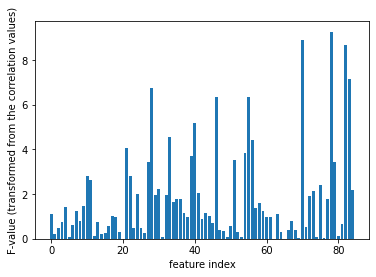

SelectKBest(k='all', score_func=<function f_regression at 0x7fbd97dd1b70>)
[78, 70, 82, 83, 28, 55, 46, 40, 33, 56, 21, 54, 39, 51, 27, 79, 10, 22, 11, 75, 30, 84, 73, 41, 24, 32, 29, 72, 36, 35, 77, 34, 58, 9, 4, 57, 59, 7, 43, 37]
(10, 40)
(132, 10, 40)
(15, 10, 40)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 10, 128)           86528     
_________________________________________________________________
dropout_16 (Dropout)         (None, 10, 128)           0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 10, 128)           512       
_________________________________________________________________
lstm_13 (LSTM)               (None, 10, 128)           131584    
_________________________________________________________________
dropout_17 (Dropout)         (None, 10, 128)     

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1


In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
# load the data

X_train=train_x[:,0,:]
X_test=validation_x[:,0,:]
y_train=np.array(train_y)
y_test=np.array(validation_y)



# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

print(f_selector)

indices = np.argsort(f_selector.scores_)[::-1]
features_f_regression = []
for i in range(40):
    features_f_regression.append(indices[i])
print(features_f_regression)






X_train=train_x[:,0,:]
X_test=validation_x[:,0,:]
y_train=np.array(train_y)
y_test=np.array(validation_y)


train_x22=train_x[:,:,features_f_regression]
validation_x22=validation_x[:,:,features_f_regression]
print(train_x22.shape[1:])
print(train_x22.shape)
print(validation_x22.shape)



model22 = Sequential()
model22.add(LSTM(128, input_shape=(train_x22.shape[1:]), return_sequences=True))
model22.add(Dropout(0.2))
model22.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.
 
model22.add(LSTM(128, return_sequences=True))
model22.add(Dropout(0.1))
model22.add(BatchNormalization())

model22.add(LSTM(64))
model22.add(Dropout(0.2))
model22.add(BatchNormalization())
 
model22.add(Dense(64, activation='relu'))
model22.add(Dropout(0.2))

model22.add(Dense(5, activation='softmax'))


opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
 
# Compile model
model22.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])
#model.compile(optimizer='adam', loss='mse')
print(model22.summary())

earlystopping_model22 = callbacks.EarlyStopping(monitor ="val_loss", mode ="auto", patience = 20,restore_best_weights = True) 
history = model22.fit(train_x22, np.array(train_y),batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(validation_x22, np.array(validation_y)),callbacks =[earlystopping_model22])

score2 = model22.evaluate(validation_x22, np.array(validation_y), verbose=1)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])
pred22=model22.predict_classes(X_LSAT[:,:,features_f_regression])
print(pred22[0])

In [ ]:
X_train=train_x[:,0,features_f_regression]
X_test=validation_x[:,0,features_f_regression]
y_train=np.array(train_y)
y_test=np.array(validation_y)
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_train)
pred33=logmodel.predict(X_LSAT[:,0,features_f_regression])
print(pred33[0])

2.0


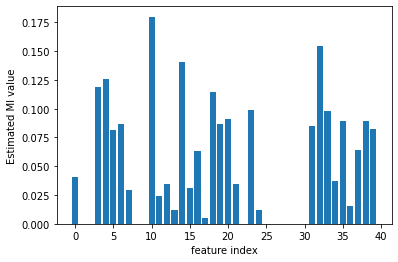

[10, 32, 14, 4, 3, 18, 23, 33, 20, 35, 38, 19, 6, 31, 39, 5, 37, 16, 0, 34, 12, 21, 15, 7, 11, 36, 24, 13, 17, 26, 1, 2, 22, 28, 8, 30, 25, 29, 27, 9]
(10, 40)
(132, 10, 40)
(15, 10, 40)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 10, 128)           86528     
_________________________________________________________________
dropout_20 (Dropout)         (None, 10, 128)           0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 10, 128)           512       
_________________________________________________________________
lstm_16 (LSTM)               (None, 10, 128)           131584    
_________________________________________________________________
dropout_21 (Dropout)         (None, 10, 128)           0         
_________________________________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


3


In [ ]:
# feature selection
f_selector = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)
# Plot the scores for the features

plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("Estimated MI value")
plt.show()

indices = np.argsort(f_selector.scores_)[::-1]
featuresKBest = []
for i in range(40):
    featuresKBest.append(indices[i])
print(featuresKBest)

X_train=train_x[:,0,:]
X_test=validation_x[:,0,:]
y_train=np.array(train_y)
y_test=np.array(validation_y)


train_x22=train_x[:,:,featuresKBest]
validation_x22=validation_x[:,:,featuresKBest]
print(train_x22.shape[1:])
print(train_x22.shape)
print(validation_x22.shape)

model22 = Sequential()
model22.add(LSTM(128, input_shape=(train_x22.shape[1:]), return_sequences=True))
model22.add(Dropout(0.2))
model22.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.
 
model22.add(LSTM(128, return_sequences=True))
model22.add(Dropout(0.1))
model22.add(BatchNormalization())

model22.add(LSTM(64))
model22.add(Dropout(0.2))
model22.add(BatchNormalization())
 
model22.add(Dense(64, activation='relu'))
model22.add(Dropout(0.2))

model22.add(Dense(5, activation='softmax'))


opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
 
# Compile model
model22.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])
#model.compile(optimizer='adam', loss='mse')
print(model22.summary())

earlystopping_model22 = callbacks.EarlyStopping(monitor ="val_loss", mode ="auto", patience = 20,restore_best_weights = True) 
history = model22.fit(train_x22, np.array(train_y),batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(validation_x22, np.array(validation_y)),callbacks =[earlystopping])

score2 = model22.evaluate(validation_x22, np.array(validation_y), verbose=1)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])
pred22=model22.predict_classes(X_LSAT[:,:,featuresKBest])
print(pred22[0])

In [ ]:
X_train=train_x[:,0,featuresKBest]
X_test=validation_x[:,0,featuresKBest]
y_train=np.array(train_y)
y_test=np.array(validation_y)
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_train)
pred33=logmodel.predict(X_LSAT[:,0,featuresKBest])
print(pred33[0])

3.0


In [ ]:
from concurrent.futures.thread import ThreadPoolExecutor
from io import StringIO
from pathlib import Path
from typing import List, Union
from bs4 import BeautifulSoup

import pandas as pd
from requests import HTTPError
!pip install jdatetime

import jdatetime 
!pip install pytse_client

from pytse_client import config, symbols_data, tse_settings
from pytse_client.utils import requests_retry_session
from pytse_client.tse_settings import TSE_CLIENT_TYPE_DATA_URL
import json


import requests
from requests.adapters import HTTPAdapter
from urllib3 import Retry


def requests_retry_session(
        retries=10,
        backoff_factor=0.3,
        status_forcelist=(500, 502, 504, 503),
        session=None,
):
    session = session or requests.Session()
    retry = Retry(
        total=retries,
        read=retries,
        connect=retries,
        backoff_factor=backoff_factor,
        status_forcelist=status_forcelist,
    )
    adapter = HTTPAdapter(max_retries=retry)
    session.mount('http://', adapter)
    session.mount('https://', adapter)
    return session



url = 'http://www.tsetmc.com/Loader.aspx?ParTree=111C1417'
response = requests_retry_session().get(url, timeout=10)

response.raise_for_status()


data = StringIO(response.text)

soup=response.text.replace('ک', 'ك').replace('ی', 'ي')
soup2 = BeautifulSoup(soup, 'html.parser')

table_rows = soup2.find_all('tr')

res = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)


df = pd.DataFrame(res, columns=['code', 'group', 'industry group', 'tablo','namad','latin_name','namad','nam'])
print(df)

In [ ]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


#انجام تست های مختلف بر روی مدل های متفاوت 

models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn import preprocessing
from ta.volatility import BollingerBands
from ta.trend import MACD
from ta.momentum import RSIIndicator
from keras.models import Sequential
from keras.layers import Conv1D,MaxPool1D,Bidirectional,LSTM,Dropout,TimeDistributed
from keras.layers import Dense,GlobalAveragePooling2D
from ta.trend import IchimokuIndicator
from sklearn.linear_model import LinearRegression
from keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from keras.layers import Dense,GlobalAveragePooling2D
import matplotlib.pyplot as plt
filename = 'AAPL'
stock = pd.read_csv('Data/' + filename + '.csv')
indicator_bb = BollingerBands(close=stock["Close"], n=20, ndev=2)
macd = MACD(close=stock["Close"])
rsi = RSIIndicator(close=stock["Close"])
ichi = IchimokuIndicator(high=stock["High"],low=stock["Low"])
stock['macd'] = macd.macd()
stock['rsi'] = rsi.rsi()
stock['bb_bbm'] = indicator_bb.bollinger_mavg()
stock['bb_bbh'] = indicator_bb.bollinger_hband()
stock['bb_bbl'] = indicator_bb.bollinger_lband()
stock['ichi_a'] = ichi.ichimoku_a()
stock['ichi_b'] = ichi.ichimoku_b()
stock['ichi_base'] = ichi.ichimoku_base_line()
stock['ichi_conv'] = ichi.ichimoku_conversion_line()
stock = stock.fillna(0)
print(stock)
#
scaler = preprocessing.MinMaxScaler()
scaled_values = scaler.fit_transform(stock.iloc[:,1:4])
stock.iloc[:,1:4] = scaled_values

y_scaler = preprocessing.MinMaxScaler()
scaled_values = y_scaler.fit_transform(np.array(stock.iloc[:,4]).reshape(-1,1))
stock.iloc[:,4] = scaled_values

scaler = preprocessing.MinMaxScaler()
scaled_values = scaler.fit_transform(stock.iloc[:,5:])
stock.iloc[:,5:] = scaled_values

Lstock = stock.drop(['Close','Date'],1)
model = LinearRegression()
model.fit(Lstock.iloc[:,:], stock.iloc[:,4])
importance = model.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([Lstock.columns[x] for x in range(len(importance))], importance)
plt.show()
stock_final = stock.drop(['Date','Open','Volume','macd','bb_bbm','bb_bbh','bb_bbl','ichi_a','ichi_conv'],1)

window_size = 50
week = 7
X = []
Y = []
print(stock_final)
for i in range(0 , len(stock) - window_size -1 , 1):
    # first = stock.iloc[i, 4]
    # temp = []
    # temp2 = []
    # for j in range(window_size):
    #     temp.append((stock_final.iloc[i + j, 4] - first) / first)
   # for j in range(week):
   #  temp2.append((stock.iloc[i +window_size, 4] - first) / first)
    X.append(np.array(stock_final.iloc[i:i+window_size,:]).reshape(window_size * 7,1))
    Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    # X.append(np.array(temp).reshape(50, 1))
    # Y.append(np.array(temp2).reshape(1,1))
train_X,test_X,train_label,test_label = train_test_split(X, Y, test_size=0.1,shuffle=False)
len_t = len(train_X)
# train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_label, test_size=0.2,shuffle=True)
train_X = np.array(train_X)
test_X = np.array(test_X)
train_label = np.array(train_label)
test_label = np.array(test_label)
# valid_label = np.array(valid_label)
# valid_X = np.array(valid_X)
train_X = train_X.reshape(train_X.shape[0],7,50,1)
test_X = test_X.reshape(test_X.shape[0],7,50,1)
model = Sequential()
#add model layers
model.add(TimeDistributed(Conv1D(128, kernel_size=1, activation='relu', input_shape=(None,50,1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(256, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(512, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(200,return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')
model.fit(train_X, train_label, validation_data=(test_X,test_label), epochs=200)
print(model.summary())
print(model.evaluate(test_X,test_label))
# model.summary()
# predicted  = model.predict(test_X)
# test_label = (test_label[:,0])
# predicted = np.array(predicted[:,0]).reshape(-1,1)
# for j in range(len_t , len_t + len(test_X)):
#     temp =stock.iloc[j,4]
#     test_label[j - len_t] = test_label[j - len_t] * temp + temp
#     predicted[j - len_t] = predicted[j - len_t] * temp + temp
# plt.plot(test_label, color = 'black', label = ' Stock Price')
# plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
# plt.title(' Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel(' Stock Price')
# plt.legend()
# plt.show()
predicted  = model.predict(test_X)
test_label[:,0] = y_scaler.inverse_transform(test_label[:,0])
predicted = np.array(predicted[:,0]).reshape(-1,1)
predicted = y_scaler.inverse_transform(predicted)
plt.plot(test_label[:,0], color = 'black', label = ' Stock Price')
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# **XGBoost for stock trend & prices prediction**(https://www.kaggle.com/code/mtszkw/xgboost-for-stock-trend-prices-prediction)


In [ ]:
import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Time series decomposition
!pip install stldecompose
from stldecompose import decompose

# Chart drawing
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Mute sklearn warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)

# Show charts when running kernel
init_notebook_mode(connected=True)

# Change default background color for all visualizations
layout=go.Layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(250,250,250,0.8)')
fig = go.Figure(layout=layout)
templated_fig = pio.to_templated(fig)
pio.templates['my_template'] = templated_fig.layout.template
pio.templates.default = 'my_template'

In [ ]:
#اینجا دیتا فریم نماد رو اضافه کن
ETF_NAME = 'CERN'
ETF_DIRECTORY = '/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/'

df = pd.read_csv(os.path.join(ETF_DIRECTORY, ETF_NAME.lower() + '.us.txt'), sep=',')

df['Date'] = pd.to_datetime(df['Date'])
df = df[(df['Date'].dt.year >= 2010)].copy()
df.index = range(len(df))

df.head()

In [ ]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Ohlc(x=df.Date,
                      open=df.Open,
                      high=df.High,
                      low=df.Low,
                      close=df.Close,
                      name='Price'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.Date, y=df.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [ ]:
df_close = df[['Date', 'Close']].copy()
df_close = df_close.set_index('Date')
df_close.head()

decomp = decompose(df_close, period=365)
fig = decomp.plot()
fig.set_size_inches(20, 8)

In [ ]:
df['EMA_9'] = df['Close'].ewm(9).mean().shift()
df['SMA_5'] = df['Close'].rolling(5).mean().shift()
df['SMA_10'] = df['Close'].rolling(10).mean().shift()
df['SMA_15'] = df['Close'].rolling(15).mean().shift()
df['SMA_30'] = df['Close'].rolling(30).mean().shift()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Date, y=df.EMA_9, name='EMA 9'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_5, name='SMA 5'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_10, name='SMA 10'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_15, name='SMA 15'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_30, name='SMA 30'))
fig.add_trace(go.Scatter(x=df.Date, y=df.Close, name='Close', opacity=0.2))
fig.show()

In [ ]:
def relative_strength_idx(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

df['RSI'] = relative_strength_idx(df).fillna(0)

fig = go.Figure(go.Scatter(x=df.Date, y=df.RSI, name='RSI'))
fig.show()

In [ ]:


EMA_12 = pd.Series(df['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(df['Close'].ewm(span=26, min_periods=26).mean())
df['MACD'] = pd.Series(EMA_12 - EMA_26)
df['MACD_signal'] = pd.Series(df.MACD.ewm(span=9, min_periods=9).mean())

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=df.Date, y=df.Close, name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=EMA_12, name='EMA 12'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=EMA_26, name='EMA 26'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=df['MACD'], name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=df['MACD_signal'], name='Signal line'), row=2, col=1)
fig.show()



In [ ]:
df['Close'] = df['Close'].shift(-1)

In [ ]:
df = df.iloc[33:] # Because of moving averages and MACD line
df = df[:-1]      # Because of shifting close price

df.index = range(len(df))

In [ ]:
test_size  = 0.15
valid_size = 0.15

test_split_idx  = int(df.shape[0] * (1-test_size))
valid_split_idx = int(df.shape[0] * (1-(valid_size+test_size)))

train_df  = df.loc[:valid_split_idx].copy()
valid_df  = df.loc[valid_split_idx+1:test_split_idx].copy()
test_df   = df.loc[test_split_idx+1:].copy()

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.Date, y=train_df.Close, name='Training'))
fig.add_trace(go.Scatter(x=valid_df.Date, y=valid_df.Close, name='Validation'))
fig.add_trace(go.Scatter(x=test_df.Date,  y=test_df.Close,  name='Test'))
fig.show()

In [ ]:
drop_cols = ['Date', 'Volume', 'Open', 'Low', 'High', 'OpenInt']

train_df = train_df.drop(drop_cols, 1)
valid_df = valid_df.drop(drop_cols, 1)
test_df  = test_df.drop(drop_cols, 1)

In [ ]:
y_train = train_df['Close'].copy()
X_train = train_df.drop(['Close'], 1)

y_valid = valid_df['Close'].copy()
X_valid = valid_df.drop(['Close'], 1)

y_test  = test_df['Close'].copy()
X_test  = test_df.drop(['Close'], 1)

X_train.info()

In [ ]:
%%time

parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

eval_set = [(X_train, y_train), (X_valid, y_valid)]
model = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=False)
clf = GridSearchCV(model, parameters)

clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

In [ ]:
model = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror')
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

In [ ]:
plot_importance(model);

In [ ]:
y_pred = model.predict(X_test)
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {y_pred[:5]}')

In [ ]:
print(f'mean_squared_error = {mean_squared_error(y_test, y_pred)}')

In [ ]:
predicted_prices = df.loc[test_split_idx+1:].copy()
predicted_prices['Close'] = y_pred

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=df.Date, y=df.Close,
                         name='Truth',
                         marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=predicted_prices.Close,
                         name='Prediction',
                         marker_color='MediumPurple'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_test,
                         name='Truth',
                         marker_color='LightSkyBlue',
                         showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_pred,
                         name='Prediction',
                         marker_color='MediumPurple',
                         showlegend=False), row=2, col=1)

fig.show()